In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [2]:
trans = pd.read_csv('Transactions_Cleaned.csv')
cust = pd.read_csv('CustomerDemographic_Cleaned.csv')

In [3]:
trans.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82


In [4]:
print("Total records (rows): {}".format(trans.shape[0]))
print("Total features (columns): {}".format(trans.shape[1]))

Total records (rows): 19803
Total features (columns): 14


In [5]:
cust.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,12-10-1953,Executive Secretary,Health,Mass Customer,N,Yes,11,70
1,2,Eli,Bockman,Male,81,16-12-1980,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,43
2,3,Arlin,Dearle,Male,61,20-01-1954,Recruiting Manager,Property,Mass Customer,N,Yes,15,70
3,4,Talbot,NaN,Male,33,03-10-1961,Missing,IT,Mass Customer,N,No,7,62
4,5,Sheila-kathryn,Calton,Female,56,13-05-1977,Senior Editor,Missing,Affluent Customer,N,Yes,8,47


In [6]:
print("Total records (rows): {}".format(cust.shape[0]))
print("Total features (columns): {}".format(cust.shape[1]))

Total records (rows): 3912
Total features (columns): 13


In [7]:
merged_trans_cust = pd.merge(trans, cust, left_on='customer_id', right_on='customer_id', how='inner')

In [8]:
merged_trans_cust.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,11-01-1955,Software Engineer I,Financial Services,Mass Customer,N,Yes,10,69
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Female,89,04-02-1979,Clinical Specialist,Health,Mass Customer,N,Yes,10,45
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,Male,9,03-06-1977,Desktop Support Technician,Retail,Affluent Customer,N,No,22,46
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,Male,83,14-01-1962,Staff Scientist,Financial Services,Mass Customer,N,No,16,62
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,Female,29,15-12-1996,Missing,Retail,Affluent Customer,N,Yes,2,27


In [9]:
print("Total records (rows): {}".format(merged_trans_cust.shape[0]))
print("Total features (columns): {}".format(merged_trans_cust.shape[1]))

Total records (rows): 19354
Total features (columns): 26


In [10]:
merged_trans_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19354 entries, 0 to 19353
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19354 non-null  int64  
 1   product_id                           19354 non-null  int64  
 2   customer_id                          19354 non-null  int64  
 3   transaction_date                     19354 non-null  object 
 4   online_order                         19354 non-null  float64
 5   order_status                         19354 non-null  object 
 6   brand                                19354 non-null  object 
 7   product_line                         19354 non-null  object 
 8   product_class                        19354 non-null  object 
 9   product_size                         19354 non-null  object 
 10  list_price                           19354 non-null  float64
 11  standard_cost               

In [11]:
merged_trans_cust['transaction_date']= pd.to_datetime(merged_trans_cust['transaction_date'])

In [12]:
max_trans_date = max(merged_trans_cust['transaction_date']).date()
max_trans_date

datetime.date(2017, 12, 30)

In [13]:
comparison_date = datetime.strptime(str(max_trans_date), "%Y-%m-%d")

In [14]:
rfm_table = merged_trans_cust.groupby(['customer_id']).agg({'transaction_date': lambda date : (comparison_date - date.max()).days,
                                                            'product_id' : lambda prod_id : len(prod_id), 
                                                            'Profit' : lambda p : sum(p)})

In [15]:
rfm_table.columns

Index(['transaction_date', 'product_id', 'Profit'], dtype='object')

In [16]:
rfm_table.rename(columns={'transaction_date' : 'recency', 
                        'product_id' : 'frequency',
                        'Profit' : 'monetary'} , inplace=True)

In [18]:
rfm_table['r_quartile'] = pd.qcut(rfm_table['recency'], 4, ['4','3','2','1'])
rfm_table['f_quartile'] = pd.qcut(rfm_table['frequency'], 4, ['1','2','3','4'])
rfm_table['m_quartile'] = pd.qcut(rfm_table['monetary'], 4, ['1','2','3','4'])

In [19]:
rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
customer_id,,,,,,
1,7,11,3018.09,4,4,3
2,128,3,2226.26,1,1,2
3,102,8,3362.81,1,4,3
4,195,2,220.57,1,1,1
5,16,6,2394.94,4,2,2
...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2
3497,52,3,1648.32,2,1,1
3498,127,6,3147.33,1,2,3


In [20]:
rfm_table['rfm_score'] = 100*rfm_table['r_quartile'].astype(int)+10*rfm_table['f_quartile'].astype(int)+rfm_table['m_quartile'].astype(int)

In [21]:
rfm_table['customer_title'] = pd.qcut(rfm_table['rfm_score'], 4, ['Bronze','Silver','Gold','Platinum'])

In [22]:
rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title
customer_id,,,,,,,,
1,7,11,3018.09,4,4,3,443,Platinum
2,128,3,2226.26,1,1,2,112,Bronze
3,102,8,3362.81,1,4,3,143,Bronze
4,195,2,220.57,1,1,1,111,Bronze
5,16,6,2394.94,4,2,2,422,Platinum
...,...,...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2,112,Bronze
3497,52,3,1648.32,2,1,1,211,Bronze
3498,127,6,3147.33,1,2,3,123,Bronze


In [23]:
cust_trans_rfm = pd.merge(merged_trans_cust, rfm_table, left_on='customer_id', right_on='customer_id', how='inner')

In [24]:
cust_trans_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19354 entries, 0 to 19353
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19354 non-null  int64         
 1   product_id                           19354 non-null  int64         
 2   customer_id                          19354 non-null  int64         
 3   transaction_date                     19354 non-null  datetime64[ns]
 4   online_order                         19354 non-null  float64       
 5   order_status                         19354 non-null  object        
 6   brand                                19354 non-null  object        
 7   product_line                         19354 non-null  object        
 8   product_class                        19354 non-null  object        
 9   product_size                         19354 non-null  object        
 10  list_price

In [25]:
cust_trans_rfm['Age_Group'] = cust_trans_rfm['Age'].apply(lambda x : (math.floor(x/10)+1)*10)

In [81]:
def cust_score_title_lkup(cols):
    
    rfm_score = cols[0]
    
    if rfm_score >= 444:
        return 'Platinum Customer'
    elif rfm_score >=433 and rfm_score < 444:
        return 'Very Loyal'
    elif rfm_score >=421 and rfm_score < 433:
        return 'Becoming Loyal'
    elif rfm_score >=344 and rfm_score < 421:
        return 'Recent Customer'
    elif rfm_score >=323 and rfm_score < 344:
        return 'Potential Customer'
    elif rfm_score >=311 and rfm_score < 323:
        return 'Late Bloomer'
    elif rfm_score >=224 and rfm_score < 311:
        return 'Loosing Customer'
    elif rfm_score >=212 and rfm_score < 224:
        return 'High Risk Customer'
    elif rfm_score >=124 and rfm_score < 212:
        return 'Almost Lost Customer'
    elif rfm_score >=112 and rfm_score < 124:
        return 'Evasive Customer'
    else :
        return 'Lost Customer'

In [82]:
cust_trans_rfm['detail_cust_title']=cust_trans_rfm[['rfm_score']].apply(cust_score_title_lkup)

In [83]:

def get_rank(cols):
    
    title = cols[0]
    
    if title=='Platinum Customer':
        return 1
    elif title=='Very Loyal':
        return 2
    elif title == 'Becoming Loyal':
        return 3
    elif title == 'Recent Customer':
        return 4
    elif title=='Potential Customer':
        return 5
    elif title == 'Late Bloomer':
        return 6
    elif title == 'Loosing Customer':
        return 7
    elif title=='High Risk Customer':
        return 8
    elif title == 'Almost Lost Customer':
        return 9
    elif title == 'Evasive Customer':
        return 10
    else :
        return 11


In [84]:

cust_trans_rfm['rank']=cust_trans_rfm[['detail_cust_title']].apply(get_rank)

In [85]:
cust_trans_rfm.to_csv('Customer_Trans_RFM_Analysis.csv', index=False)

In [86]:
new_cust = pd.read_csv('NewCustomerList_Cleaned.csv')

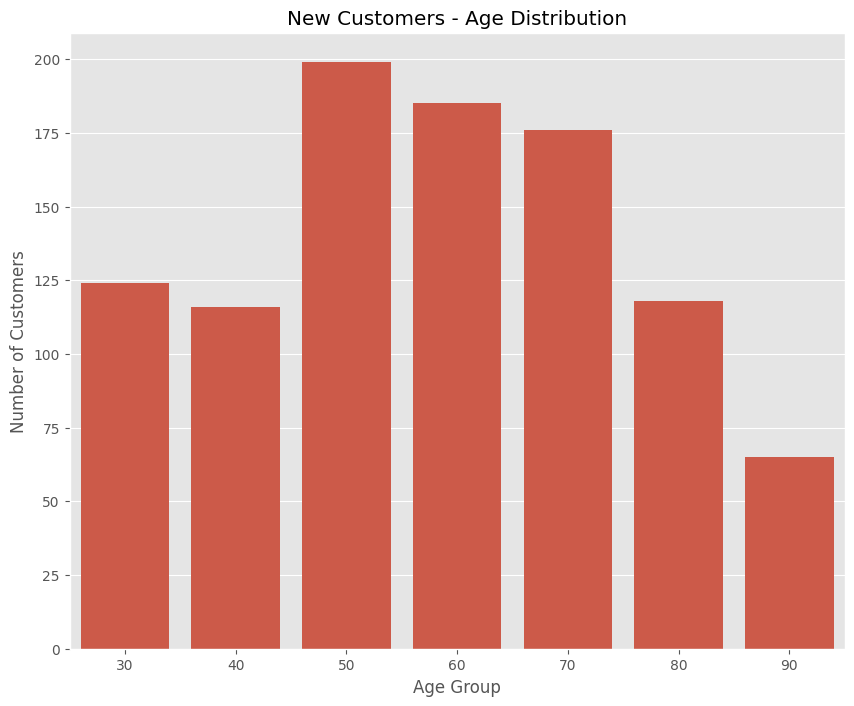

In [87]:
plt.figure(figsize=(10, 8))
sns.countplot(data=new_cust, x='Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('New Customers - Age Distribution')

plt.show()

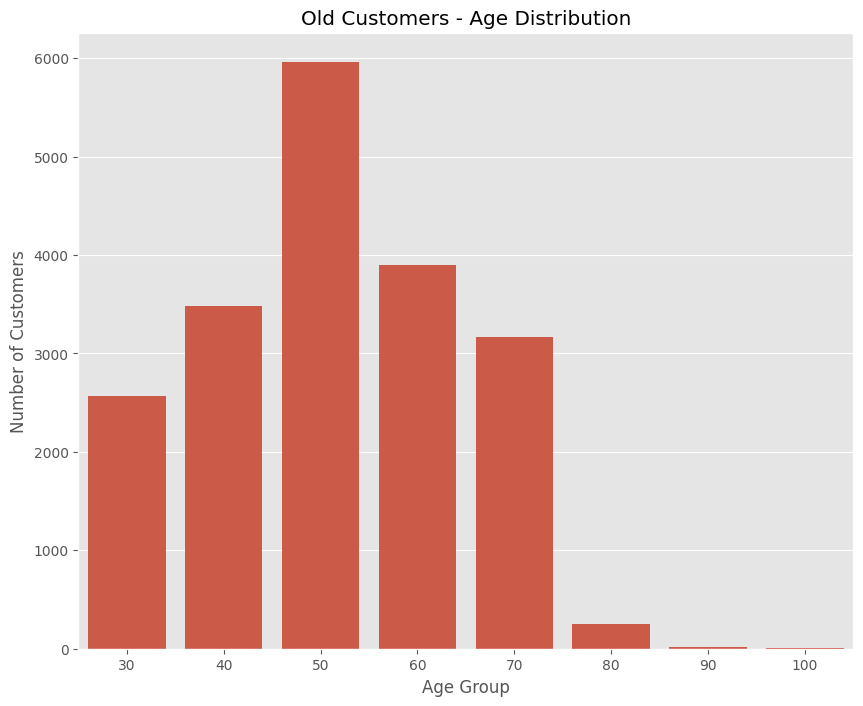

In [88]:


plt.figure(figsize=(10, 8))
sns.countplot(data=cust_trans_rfm, x='Age_Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Age Distribution')

plt.show()


In [89]:
cust_bike_purchase_by_gender = cust_trans_rfm.groupby('gender').agg({'past_3_years_bike_related_purchases': 'sum'}).reset_index()
print(cust_bike_purchase_by_gender)

   gender  past_3_years_bike_related_purchases
0  Female                               478488
1    Male                               468943


In [90]:
total_records = cust_trans_rfm['past_3_years_bike_related_purchases'].sum()

In [91]:
cust_bike_purchase_by_gender['Percent_of_total'] = (cust_bike_purchase_by_gender['past_3_years_bike_related_purchases']
                                                        /total_records)*100


In [92]:
cust_bike_purchase_by_gender

,gender,past_3_years_bike_related_purchases,Percent_of_total
0,Female,478488,50.503731
1,Male,468943,49.496269


C:\Users\Rushikesh\AppData\Local\Temp\ipykernel_19952\2711617406.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='Percent_of_total', data=cust_bike_purchase_by_gender, palette=custom_palette)


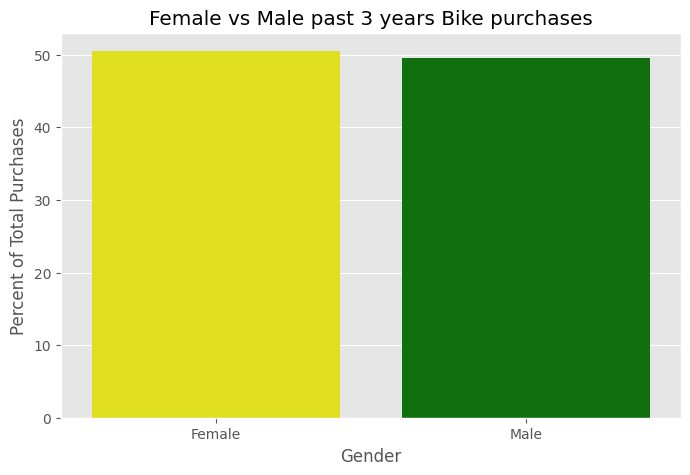

In [93]:
custom_palette = {'Male': 'green', 'Female': 'yellow'}

plt.figure(figsize=(8, 5))
sns.barplot(x='gender', y='Percent_of_total', data=cust_bike_purchase_by_gender, palette=custom_palette)
plt.xlabel('Gender')
plt.ylabel('Percent of Total Purchases')
plt.title('Female vs Male past 3 years Bike purchases')

plt.show()

C:\Users\Rushikesh\AppData\Local\Temp\ipykernel_19952\263512598.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='job_industry_category', data=new_cust[new_cust['job_industry_category'] != 'Missing'], palette=custom_palette)
C:\Users\Rushikesh\AppData\Local\Temp\ipykernel_19952\263512598.py:4: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.countplot(x='job_industry_category', data=new_cust[new_cust['job_industry_category'] != 'Missing'], palette=custom_palette)


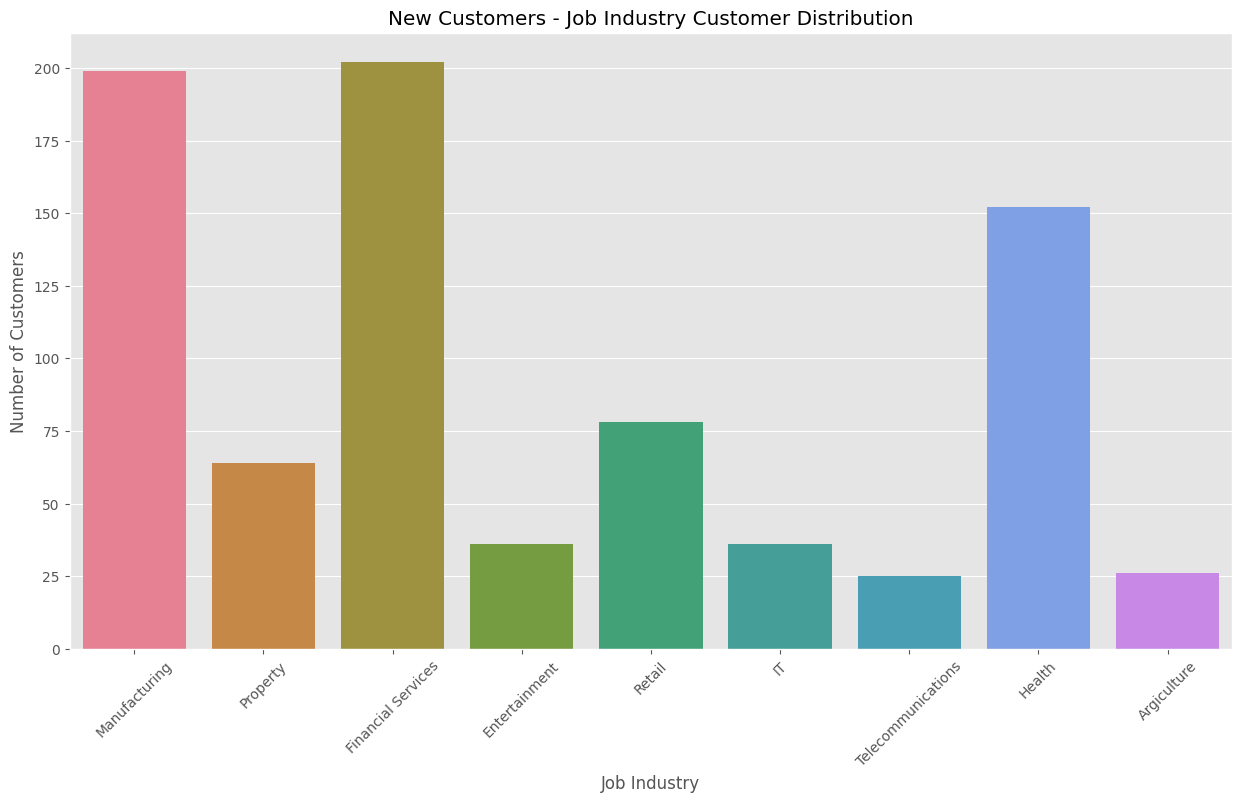

In [94]:
custom_palette = sns.color_palette("husl", len(new_cust['job_industry_category'].unique()))

plt.figure(figsize=(15, 8))
sns.countplot(x='job_industry_category', data=new_cust[new_cust['job_industry_category'] != 'Missing'], palette=custom_palette)
plt.xlabel('Job Industry')
plt.ylabel('Number of Customers')
plt.title('New Customers - Job Industry Customer Distribution')
plt.xticks(rotation=45) 

plt.show()

C:\Users\Rushikesh\AppData\Local\Temp\ipykernel_19952\3090870584.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='job_industry_category', data=cust_trans_rfm[~(cust_trans_rfm['job_industry_category'] == 'Missing')], palette=custom_palette)
C:\Users\Rushikesh\AppData\Local\Temp\ipykernel_19952\3090870584.py:4: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.countplot(x='job_industry_category', data=cust_trans_rfm[~(cust_trans_rfm['job_industry_category'] == 'Missing')], palette=custom_palette)


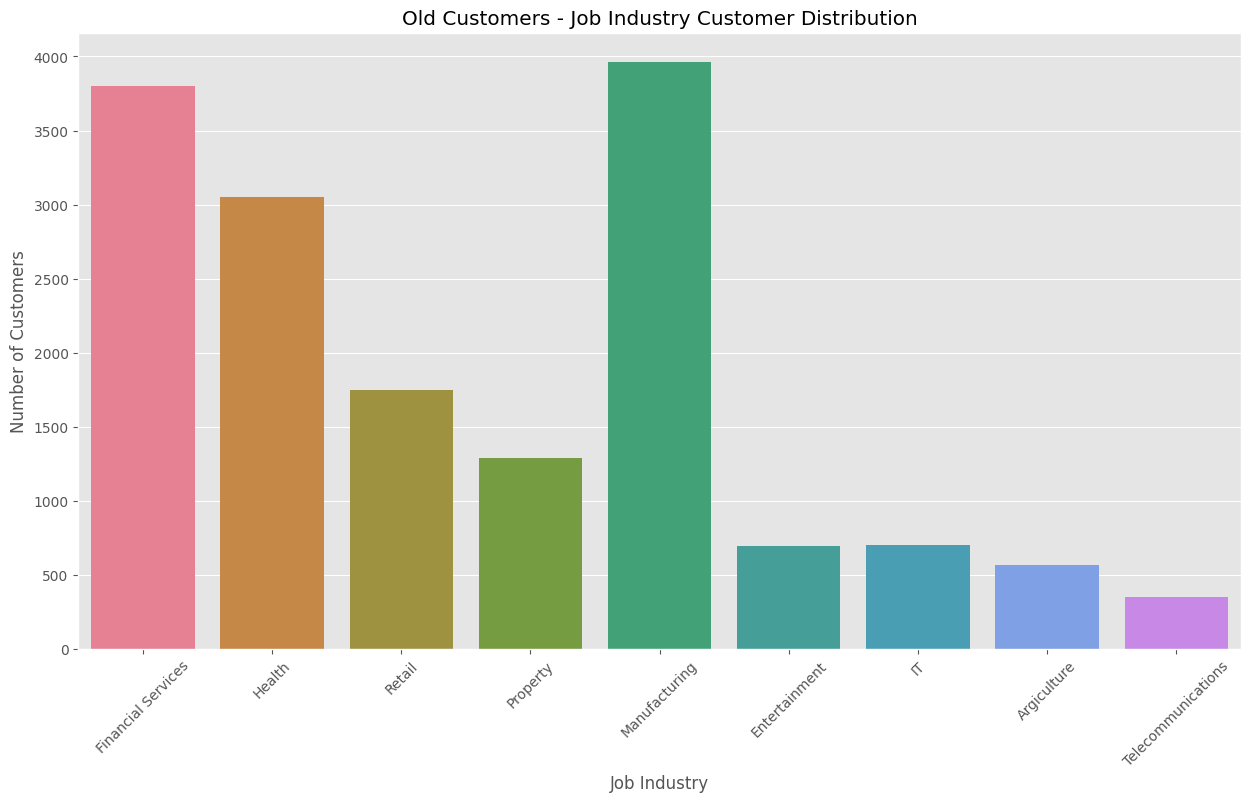

In [51]:
custom_palette = sns.color_palette("husl", len(cust_trans_rfm['job_industry_category'].unique()))

plt.figure(figsize=(15, 8))
sns.countplot(x='job_industry_category', data=cust_trans_rfm[~(cust_trans_rfm['job_industry_category'] == 'Missing')], palette=custom_palette)
plt.xlabel('Job Industry')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Job Industry Customer Distribution')
plt.xticks(rotation=45)  # Rotate x labels for better readability

plt.show()

In [52]:
wealth_age_seg_new = new_cust.groupby(['wealth_segment', 'Age Group']).size().reset_index()

In [53]:
wealth_age_seg_new.rename(columns={0:'Number of Customers'}, inplace=True)
wealth_age_seg_new

,wealth_segment,Age Group,Number of Customers
0,Affluent Customer,30,38
1,Affluent Customer,40,23
2,Affluent Customer,50,50
3,Affluent Customer,60,46
4,Affluent Customer,70,34
5,Affluent Customer,80,31
6,Affluent Customer,90,13
7,High Net Worth,30,26
8,High Net Worth,40,37
9,High Net Worth,50,51


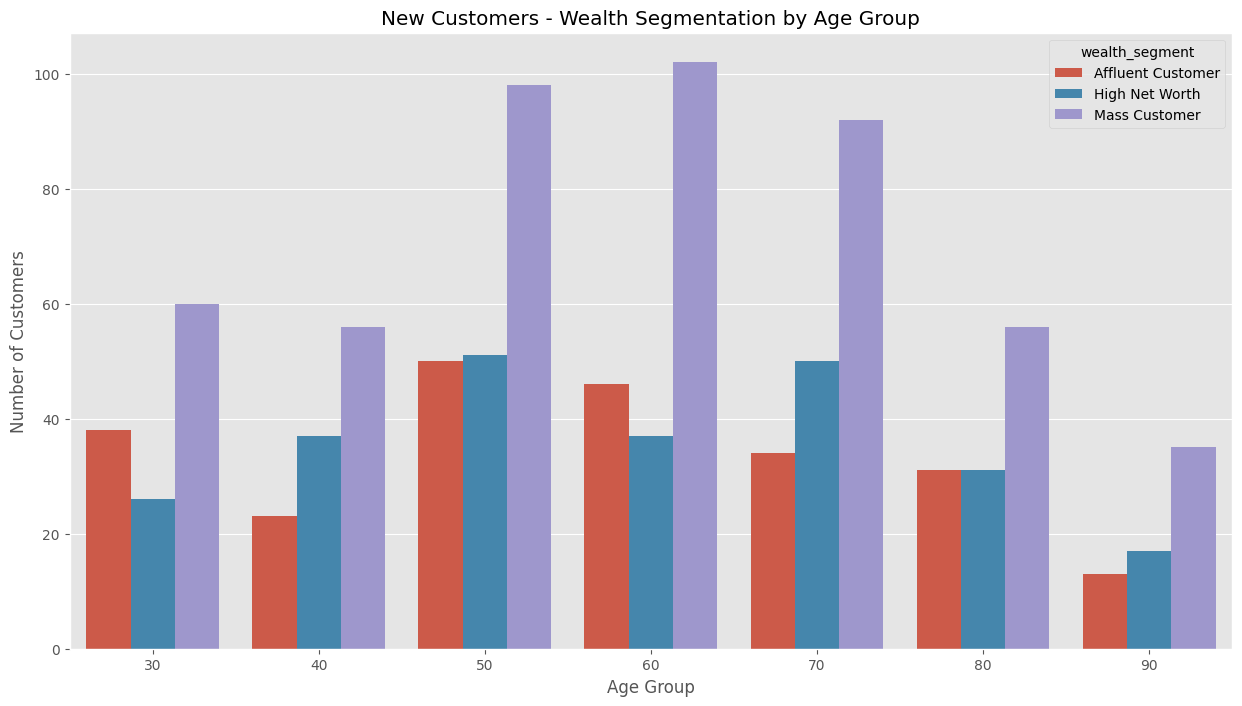

In [58]:

plt.figure(figsize=(15, 8))
sns.barplot(x='Age Group', y='Number of Customers', hue='wealth_segment', data=wealth_age_seg_new)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('New Customers - Wealth Segmentation by Age Group')
plt.show()

In [55]:
wealth_age_seg_old = cust_trans_rfm.groupby(['wealth_segment', 'Age_Group']).size().reset_index()

In [56]:
wealth_age_seg_old.rename(columns={0:'Number of Customers'}, inplace=True)

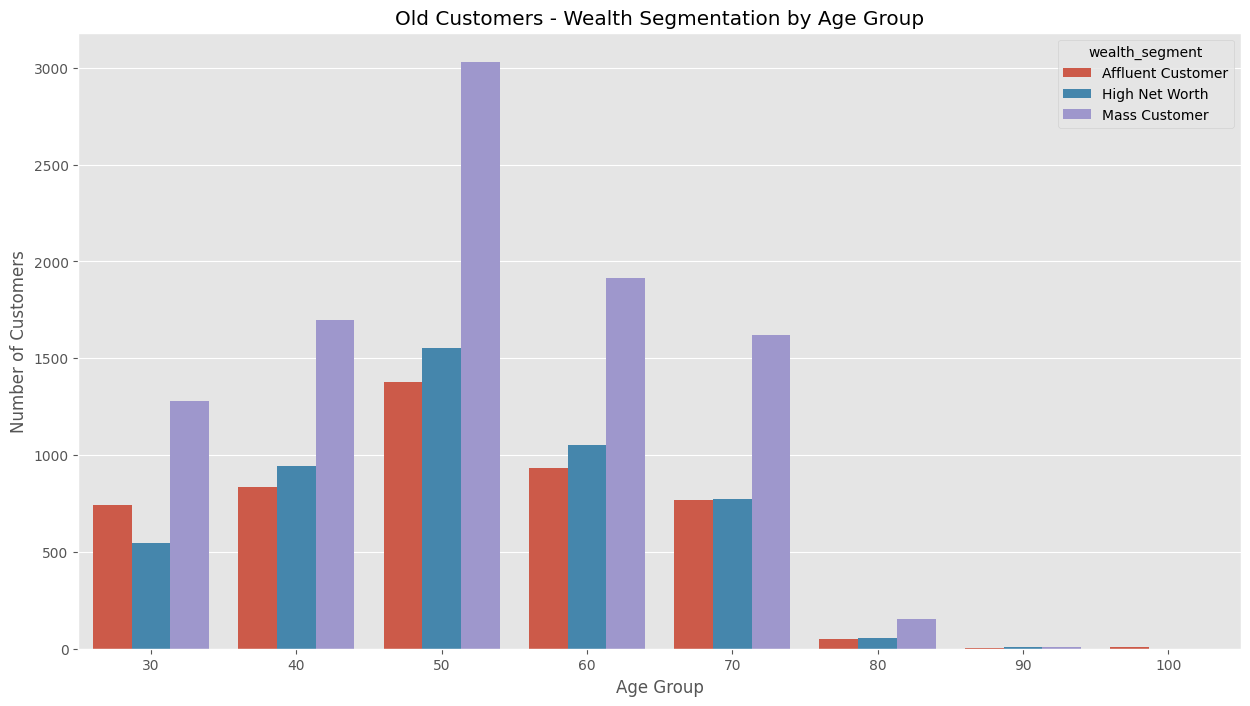

In [57]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Age_Group', y='Number of Customers', hue='wealth_segment', data=wealth_age_seg_old)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Wealth Segmentation by Age Group')
plt.show()

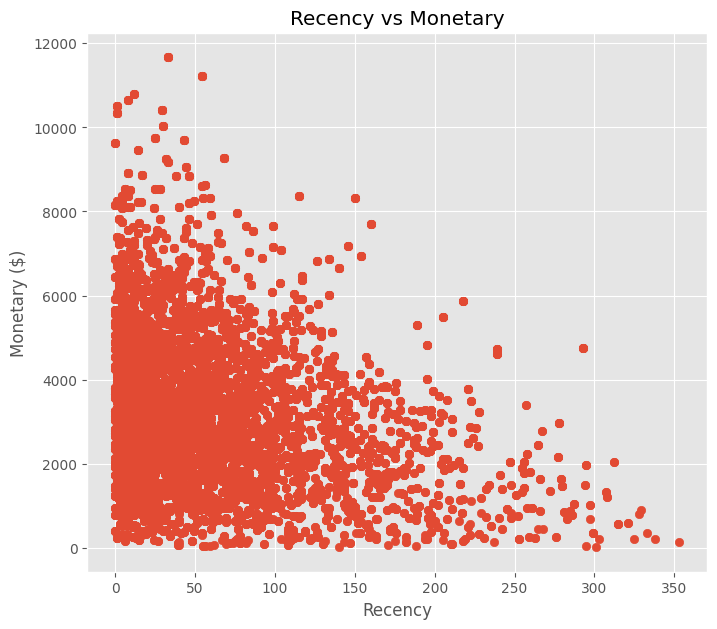

In [59]:
# RFM Analysis Scatter Plots

plt.figure(figsize=(8, 7))
plt.scatter(x=cust_trans_rfm['recency'], y=cust_trans_rfm['monetary'])
plt.xlabel('Recency')
plt.ylabel('Monetary ($)')
plt.title('Recency vs Monetary')
plt.show()

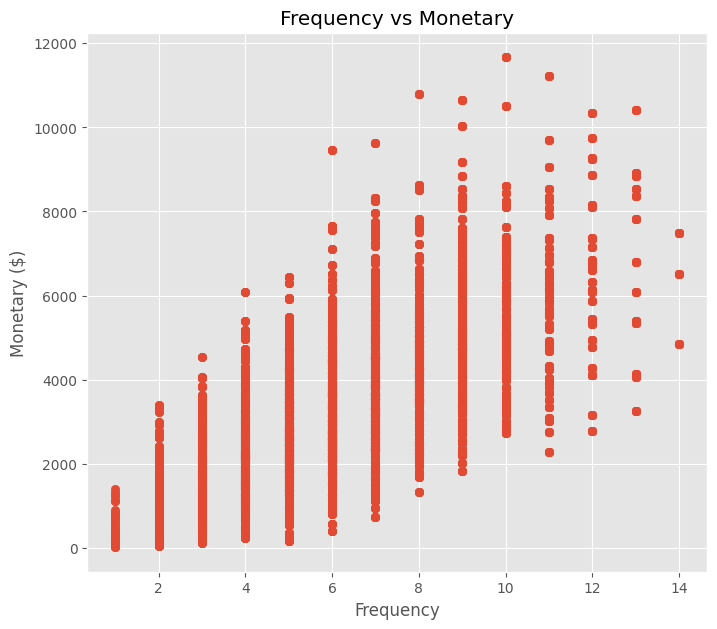

In [60]:
plt.figure(figsize=(8, 7))
plt.scatter(x=cust_trans_rfm['frequency'], y=cust_trans_rfm['monetary'])
plt.xlabel('Frequency')
plt.ylabel('Monetary ($)')
plt.title('Frequency vs Monetary')
plt.show()

In [69]:
cust_addr_info = pd.read_csv('CustomerAddress_Cleaned.csv')

In [70]:
cust_trans_addr = pd.merge(cust_trans_rfm , cust_addr_info, left_on = 'customer_id' , 
                           right_on = 'customer_id', how='inner')

In [71]:
state_car_owners = cust_trans_addr[['state' , 'owns_car' , 'customer_id']].drop_duplicates().groupby(['state', 'owns_car']).size().reset_index()

In [72]:
state_car_owners.rename(columns={0:'Number of Customers'}, inplace=True)
state_car_owners


,state,owns_car,Number of Customers
0,NSW,No,889
1,NSW,Yes,935
2,QLD,No,365
3,QLD,Yes,363
4,VIC,No,435
5,VIC,Yes,425


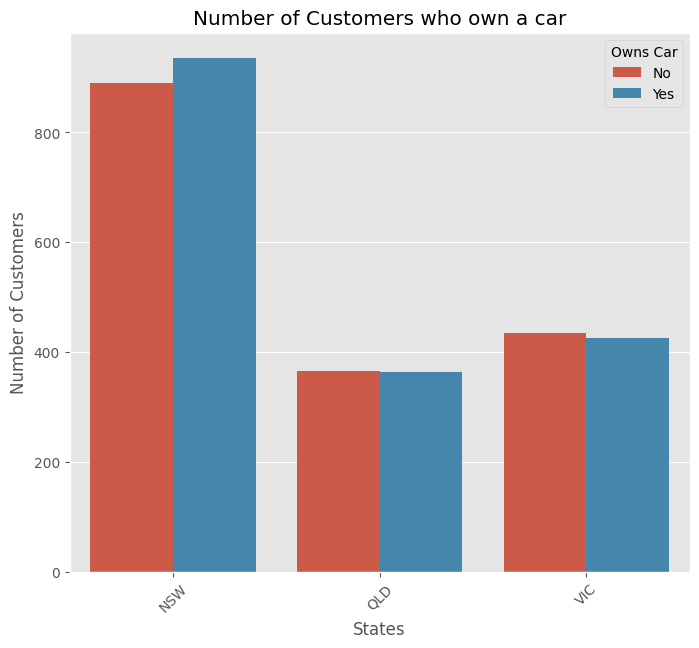

In [74]:

plt.figure(figsize=(8, 7))
sns.barplot(x='state', y='Number of Customers', hue='owns_car', data=state_car_owners)
plt.xlabel('States')
plt.ylabel('Number of Customers')
plt.title('Number of Customers who own a car')
plt.xticks(rotation=45)  # Rotate x labels for better readability if needed
plt.legend(title='Owns Car', loc='upper right')  # Add legend with title and adjust location if needed
plt.show()

In [113]:
cust_per_title = cust_trans_rfm[['detail_cust_title', 'customer_id','rank']].drop_duplicates().groupby(
    ['detail_cust_title','rank']).size().reset_index().sort_values('rank')

In [114]:
cust_per_title.rename(columns={0:'Number of Customers'}, inplace=True)
cust_per_title

,detail_cust_title,rank,Number of Customers
7,Platinum Customer,1,164
10,Very Loyal,2,181
1,Becoming Loyal,3,344
9,Recent Customer,4,357
8,Potential Customer,5,340
4,Late Bloomer,6,332
5,Loosing Customer,7,333
3,High Risk Customer,8,371
0,Almost Lost Customer,9,315
2,Evasive Customer,10,388


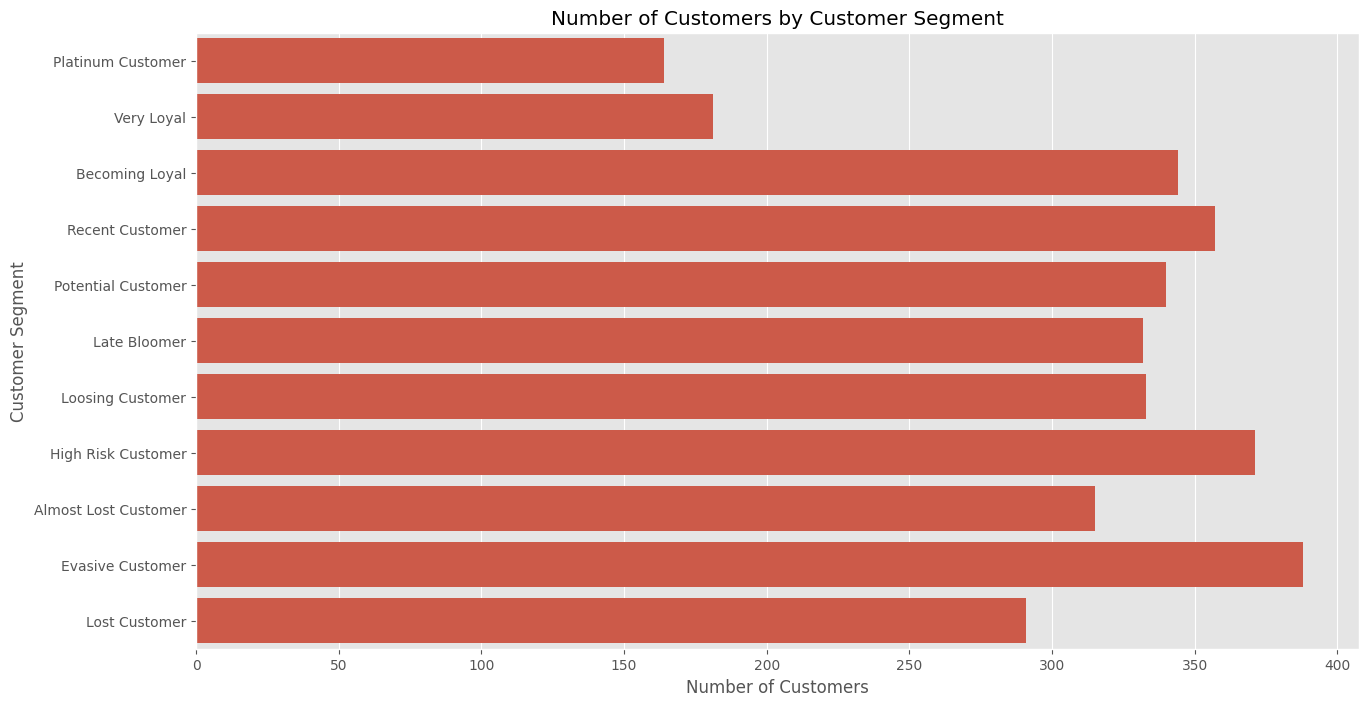

In [115]:

plt.figure(figsize=(15,8))
sns.barplot(y='detail_cust_title' , x='Number of Customers', data=cust_per_title)
plt.xlabel('Number of Customers')
plt.ylabel('Customer Segment')
plt.title('Number of Customers by Customer Segment')
plt.show()
